<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

This notebook is adapted by Zhuo Chen from the notebooks created by [Nathan Kelber](http://nkelber.com), [William Mattingly](https://datascience.si.edu/people/dr-william-mattingly) and [Melanie Walsh](https://melaniewalsh.org) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
For questions/comments/improvements, email zhuo.chen@ithaka.org or nathan.kelber@ithaka.org<br />
___

# Pandas 3 

**Description:** This notebook describes how to:
* Build a dataset from Constellate
* Make a dataframe from the dataset
* Group and aggregate data
* Plot using Pandas

This is the third notebook in a series on learning to use Pandas. 

**Use Case:** For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Knowledge Required:** 
* [Pandas 1](./pandas-1.ipynb)
* [Pandas 2](./pandas-2.ipynb)
* Python Basics ([Start Python Basics I](./python-basics-1.ipynb))

**Knowledge Recommended:** 
* [Python Intermediate 1](./python-intermediate-1.ipynb)
* [Python Intermediate 2](./python-intermediate-2.ipynb)
* [Python Intermediate 4](./python-intermediate-4.ipynb)

**Completion Time:** 90 minutes

**Data Format:** JSONL 

**Libraries Used:** Pandas

**Research Pipeline:** None
___


# Build a dataset from Constellate

In [1]:
# install and import constellate
!pip install constellate-client
import constellate

Constellate: use and download of datasets is covered by the Terms & Conditions of Use: https://constellate.org/terms-and-conditions/


The dataset we are going to use for today's lesson is the documents from JSTOR about Economics limited to document type(s) chapter and language(s) English from 2007 - 2012 and limited to full text availability.

In [2]:
# Creating a variable `dataset_id` to hold our dataset ID
# The dataset is Full-Text chapters in English 
# from the JSTOR about economics published between 2007-2012 
dataset_id = 'f7390385-7fc6-5dde-bcdf-79724bb916e5'

In [3]:
# Download the dataset
dataset_file = constellate.get_dataset(dataset_id, 'jsonl')

 from JSTOR about Economics limited to document type(s) chapter and language(s) English from 2007 - 2012 and limited to full text availability. 1217 documents.
INFO:root:File /Users/zchen/data/jsonl exists. Not re-downloading.


## Read in the data
After we download the dataset, we can use the `dataset_reader()` method to read in the data. 

In [4]:
# Use the .dataset_reader() method to read in the documents
docs = constellate.dataset_reader(dataset_file)

In [5]:
# Check the type of docs
type(docs)

generator

Recall from [Python Intermediate 1](./python-intermediate-1.ipynb) that the difference between a list and a generator is that the latter yields only one element at a time. To return the elements one by one, we use the `next()` function.

In [6]:
# Take a look at the first element of the generator docs
doc1 = next(docs)
doc1

{'abstract': 'While the focus of this report is individual-level outcomes, these outcomes are the manifestation of a spectrum of environmental, social, family and individual factors that operate together to influence individual development. In trying to understand where disparities come from and how to address them, we grounded our research in the context of a conceptual framework based on the Northridge, Sclar, and Biswas (2003) model which describes the contextual factors that interact to promote or inhibit individual health outcomes. This model highlights the multiple pathways by which factors in the physical, social, economic, and family domains contribute to individual well-being. We',
 'creator': ['LOIS M. DAVIS', 'M. REBECCA KILBURN', 'DANA J. SCHULTZ'],
 'datePublished': '2009-01-01',
 'docType': 'chapter',
 'fullText': ['CHAPTER 2 Disparities in a Social Determinant Context Before launching into the core of the report, we provide some context to help make sense of what our ana

We can see that the doc data are stored in a dictionary. 

In [7]:
# Get all keys from the dict
doc1.keys()

dict_keys(['abstract', 'creator', 'datePublished', 'docType', 'fullText', 'id', 'identifier', 'isPartOf', 'keyphrase', 'language', 'outputFormat', 'pageCount', 'pageEnd', 'pageStart', 'pagination', 'provider', 'publicationYear', 'sourceCategory', 'tdmCategory', 'title', 'url', 'wordCount', 'unigramCount', 'bigramCount', 'trigramCount'])

## Create a dataframe

In [8]:
# import the Pandas library
import pandas as pd

In [9]:
# Data of interest
data_of_interest = ['id', 'fullText', 'title', 'publicationYear', 'wordCount']

In [10]:
# Create a dataframe
df = pd.DataFrame(columns=data_of_interest)
df

,id,fullText,title,publicationYear,wordCount


In [11]:
# Get the docs again
docs = constellate.dataset_reader(dataset_file)

From each doc in docs, we want to grab the values corresponding to the keys in the list of data_of_interest and put those data under the relevant header in the dataframe.  

In [12]:
index = 0 # initialize a variable 'index' and give it a value of 0
for doc in docs:
    df.loc[index] = [doc[column] for column in data_of_interest] # use a list comprehension to add rows
    index = index + 1
df

,id,fullText,title,publicationYear,wordCount
0,http://www.jstor.org/stable/10.7249/mg745tce.9,[CHAPTER 2 Disparities in a Social Determinant...,Disparities in a Social Determinant Context,2009,1481
1,http://www.jstor.org/stable/j.ctt9qcnrp.15,[Appendix STATISTICAL TABLES AND FIGURES List ...,Appendix:,2009,3675
2,http://www.jstor.org/stable/j.ctv9hj7wb.5,[I. Introduction At the beginning of the 21st ...,Introduction,2011,1352
3,http://www.jstor.org/stable/j.ctt24hdst.11,[Chapter 5. The national reform agenda: origin...,The national reform agenda:,2008,4121
4,http://www.jstor.org/stable/j.ctt24hbgk.15,[Entry to the WTO and the domestic private eco...,Entry to the WTO and the domestic private economy,2012,4416
...,...,...,...,...,...
1212,http://www.jstor.org/stable/j.ctvc5pf20.11,"[chapter 8 Implications, Caveats, and Future R...","Implications, Caveats, and Future Research Que...",2011,5438
1213,http://www.jstor.org/stable/j.ctt46n2qg.16,"[Part 4 New immigrant receiving countries, , 1...",Greece,2009,11130
1214,http://www.jstor.org/stable/j.ctt24hb2s.12,"[Part III. Policy Issues 141, , 8. Citizen-cen...",Citizen-centred policy making under Rudd:,2010,6764
1215,http://www.jstor.org/stable/10.7249/mg1091af.6,[Summary It is far easier to notice change mar...,Summary,2011,3948


All the document ids start with "http://www.jstor.org/stable/". We can get rid of this part of the string and use the rest as the ids. 

In [13]:
# Shorten the ids
df['id'] = df['id'].apply(lambda r: r.split('stable/')[1])
df

,id,fullText,title,publicationYear,wordCount
0,10.7249/mg745tce.9,[CHAPTER 2 Disparities in a Social Determinant...,Disparities in a Social Determinant Context,2009,1481
1,j.ctt9qcnrp.15,[Appendix STATISTICAL TABLES AND FIGURES List ...,Appendix:,2009,3675
2,j.ctv9hj7wb.5,[I. Introduction At the beginning of the 21st ...,Introduction,2011,1352
3,j.ctt24hdst.11,[Chapter 5. The national reform agenda: origin...,The national reform agenda:,2008,4121
4,j.ctt24hbgk.15,[Entry to the WTO and the domestic private eco...,Entry to the WTO and the domestic private economy,2012,4416
...,...,...,...,...,...
1212,j.ctvc5pf20.11,"[chapter 8 Implications, Caveats, and Future R...","Implications, Caveats, and Future Research Que...",2011,5438
1213,j.ctt46n2qg.16,"[Part 4 New immigrant receiving countries, , 1...",Greece,2009,11130
1214,j.ctt24hb2s.12,"[Part III. Policy Issues 141, , 8. Citizen-cen...",Citizen-centred policy making under Rudd:,2010,6764
1215,10.7249/mg1091af.6,[Summary It is far easier to notice change mar...,Summary,2011,3948


In [14]:
# Explore the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1216
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1217 non-null   object
 1   fullText         1217 non-null   object
 2   title            1217 non-null   object
 3   publicationYear  1217 non-null   int64 
 4   wordCount        1217 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 57.0+ KB


## Group and aggregate data

Our dataset contains the full-text chapters in English from the JSTOR about economics published between 2007-2012. Now, suppose we would like to know how many documents there are from each year. We can use the `.grouby()` method to group the data by the publication year and then use the `.count()` method to get the number of documents from each year. 

In [15]:
# Group the data by year
df.groupby('publicationYear').count()

,id,fullText,title,wordCount
publicationYear,,,,
2007,106,106,106,106
2008,253,253,253,253
2009,210,210,210,210
2010,171,171,171,171
2011,190,190,190,190
2012,287,287,287,287


In [16]:
# Group the data by year, get the num of rows in 'id' column for each year, reset the index
doc_by_year = df.groupby('publicationYear')['id'].count()
doc_by_year

publicationYear
2007    106
2008    253
2009    210
2010    171
2011    190
2012    287
Name: id, dtype: int64

We can plot a bar chart to show the number of documents from each year in the dataset visually. To do that, we will need to download the `matplotlib` library first. Then, we will import the submodule `pyplot` from `matplotlib`. Conventionally, we will give the submodule a shorter name `plt` when we import it, in the same way that we call Pandas as `pd` when we import it. 

By default, when we use matplotlib to plot a chart, the chart will show in a separate window. We could set a parameter `inline` to show the chart immediately below the code cell that produces the chart. 

<AxesSubplot: xlabel='publicationYear', ylabel='num_of_doc'>

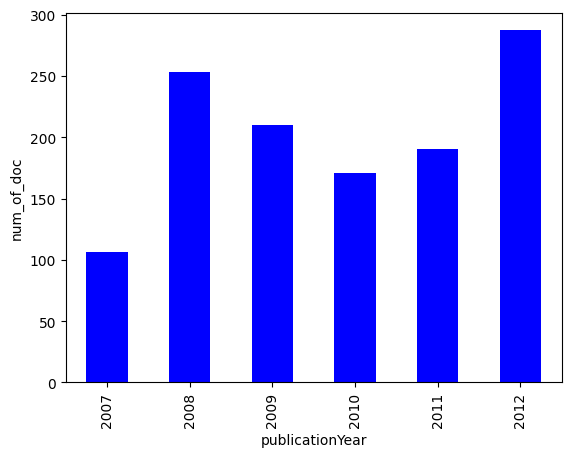

In [17]:
# Plot a bar chart to show number of docs from each year in the dataset
doc_by_year.plot(x='publicationYear', y='id', kind='bar', color='blue', ylabel='num_of_doc')

We have seen that we can group data in a dataframe by a certain label and then count how many data points we have in each subgroup. Another operation we could do is to calculate the sum of all the numerical values in a certain column after data grouping.  

For example, let's say we would like to know the sum of the word count of all the documents from each year in our dataset. To achieve this goal, we can group the data by `publicationYear`, and then aggregate the data by summing the numerical values in the column of `wordCount` for each subgroup.  

In [18]:
# Get the sum of word count for each year in the dataset, sort the result by word count
sum_word_count = df.groupby('publicationYear')['wordCount'].agg('sum').sort_values()
sum_word_count

publicationYear
2007     779480
2011    1326516
2010    1350680
2009    1603310
2008    1725174
2012    1847456
Name: wordCount, dtype: int64

<AxesSubplot: ylabel='publicationYear'>

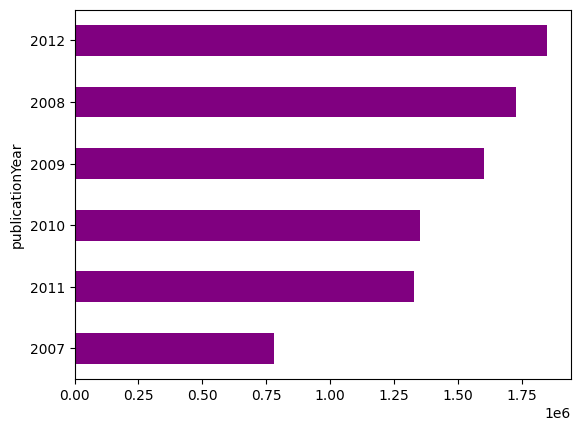

In [19]:
# Plot the sum of word count of the docs from each year
sum_word_count.plot(x='wordCount', y='publicationYear', kind='barh', color='purple')

We know that between 2007 and 2009, there was a global recession called The Great Recession. Suppose we would like to know what percentage of all the documents in our dataset mentioned recession. 

In [20]:
# Take a look at our original df
df

,id,fullText,title,publicationYear,wordCount
0,10.7249/mg745tce.9,[CHAPTER 2 Disparities in a Social Determinant...,Disparities in a Social Determinant Context,2009,1481
1,j.ctt9qcnrp.15,[Appendix STATISTICAL TABLES AND FIGURES List ...,Appendix:,2009,3675
2,j.ctv9hj7wb.5,[I. Introduction At the beginning of the 21st ...,Introduction,2011,1352
3,j.ctt24hdst.11,[Chapter 5. The national reform agenda: origin...,The national reform agenda:,2008,4121
4,j.ctt24hbgk.15,[Entry to the WTO and the domestic private eco...,Entry to the WTO and the domestic private economy,2012,4416
...,...,...,...,...,...
1212,j.ctvc5pf20.11,"[chapter 8 Implications, Caveats, and Future R...","Implications, Caveats, and Future Research Que...",2011,5438
1213,j.ctt46n2qg.16,"[Part 4 New immigrant receiving countries, , 1...",Greece,2009,11130
1214,j.ctt24hb2s.12,"[Part III. Policy Issues 141, , 8. Citizen-cen...",Citizen-centred policy making under Rudd:,2010,6764
1215,10.7249/mg1091af.6,[Summary It is far easier to notice change mar...,Summary,2011,3948


To check whether a document mentioned 'recession' or not, we will search the full text of each document for the word 'recession'. Let's first grab the full text from one document and take a look.

In [21]:
# grab the full text of the first document
df.loc[0, 'fullText']

['CHAPTER 2 Disparities in a Social Determinant Context Before launching into the core of the report, we provide some context to help make sense of what our analysis of the odds of boys and men and color relative to their white counterparts means. Here, we present the conceptual framework that underpins that analysis, as well as a brief overview of the demographics of California. Grounding our Analysis – A Conceptual Framework While the focus of this report is individual-level outcomes, these outcomes are the manifestation of a spectrum of environmental, social, family and individual factors that operate together to influence individual development. In trying to understand where disparities come from and how to address them, we grounded our research in the context of a conceptual framework based on the Northridge, Sclar, and Biswas (2003) model which describes the contextual factors that interact to promote or inhibit individual health outcomes. This model highlights the multiple pathw

In [22]:
# Join the strings in each list in the column 'fullText' into a big string
df['fullText'] = df['fullText'].apply(lambda r: ''.join(r))

In [23]:
# Create a new column storing whether a document mentioned 'recession'
df['recession'] = df['fullText'].str.contains('recession')

In [24]:
df

,id,fullText,title,publicationYear,wordCount,recession
0,10.7249/mg745tce.9,CHAPTER 2 Disparities in a Social Determinant ...,Disparities in a Social Determinant Context,2009,1481,False
1,j.ctt9qcnrp.15,Appendix STATISTICAL TABLES AND FIGURES List o...,Appendix:,2009,3675,False
2,j.ctv9hj7wb.5,I. Introduction At the beginning of the 21st c...,Introduction,2011,1352,False
3,j.ctt24hdst.11,Chapter 5. The national reform agenda: origins...,The national reform agenda:,2008,4121,False
4,j.ctt24hbgk.15,Entry to the WTO and the domestic private econ...,Entry to the WTO and the domestic private economy,2012,4416,False
...,...,...,...,...,...,...
1212,j.ctvc5pf20.11,"chapter 8 Implications, Caveats, and Future Re...","Implications, Caveats, and Future Research Que...",2011,5438,True
1213,j.ctt46n2qg.16,Part 4 New immigrant receiving countries10 Gre...,Greece,2009,11130,False
1214,j.ctt24hb2s.12,Part III. Policy Issues 1418. Citizen-centred ...,Citizen-centred policy making under Rudd:,2010,6764,False
1215,10.7249/mg1091af.6,Summary It is far easier to notice change mark...,Summary,2011,3948,True


In [25]:
# Get the rows where the value in the 'recession' column is true
recession_docs = df[df['recession']==True]
recession_docs

,id,fullText,title,publicationYear,wordCount,recession
6,j.ctt24h9qh.17,9 WTO commitment: further marketisation and tr...,WTO commitment:,2012,3517,True
24,j.ctt24hcrw.23,Chinese foreign direct investment in the Austr...,Chinese foreign direct investment in the Austr...,2009,13800,True
62,10.7249/mg861osd.10,CHAPTER TWO Background on Recruiting This chap...,Background on Recruiting,2009,7785,True
78,j.ctt24hcx9.10,Chapter 5 State-owned enterprise reform Yiping...,State-owned enterprise reform,2012,7947,True
88,j.ctt183pcr6.10,3 Out of the Shadows THE OdOuRS OF THE SpICY O...,Out of the Shadows,2012,8808,True
...,...,...,...,...,...,...
1198,10.7249/mg674osd.12,CHAPTER FOUR Discussion and Recommendations Th...,Discussion and Recommendations,2008,6866,True
1200,j.ctt183p9sr.10,3LONDON’S LOW-PAID FOREIGN-BORN WORKERS I was ...,LONDON’S LOW-PAID FOREIGN-BORN WORKERS,2010,15901,True
1209,j.ctt24hbk1.10,3 Reform of the International Economic System:...,Reform of the International Economic System:,2011,7942,True
1212,j.ctvc5pf20.11,"chapter 8 Implications, Caveats, and Future Re...","Implications, Caveats, and Future Research Que...",2011,5438,True


In [26]:
# Get how many docs from each year mentioned 'recession'
recession_docs_by_year = recession_docs.groupby('publicationYear')['recession'].count()
recession_docs_by_year

publicationYear
2007     6
2008    20
2009    33
2010    44
2011    37
2012    37
Name: recession, dtype: int64

<AxesSubplot: >

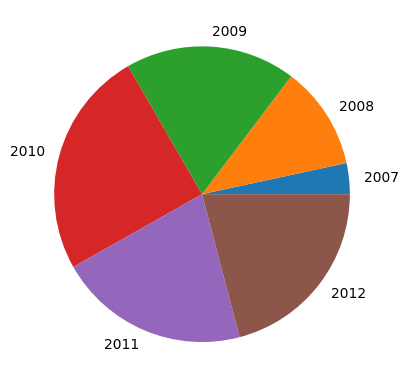

In [27]:
# Plot a pie graph showing 
# of all docs that mentioned 'recession'
# what percentage of the docs is from 2007, what percentage of the docs is from 2008,
# so on and so forth
recession_docs_by_year.plot(kind='pie', label="")

We can also plot a line graph to track the trend of the precentage of docs that mentioned 'recession' over the years. 

In [28]:
# Merge doc_by_year and recession_docs_by_year
recession_doc_count_by_year = pd.concat([doc_by_year, recession_docs_by_year], axis=1)
recession_doc_count_by_year

,id,recession
publicationYear,,
2007,106,6
2008,253,20
2009,210,33
2010,171,44
2011,190,37
2012,287,37


In [29]:
# Change the headers to make them more descriptive
recession_doc_count_by_year.rename(columns={'id':'num_of_doc', 'recession':'num_recession_doc'}, inplace=True)
recession_doc_count_by_year

,num_of_doc,num_recession_doc
publicationYear,,
2007,106,6
2008,253,20
2009,210,33
2010,171,44
2011,190,37
2012,287,37


In [30]:
# Make a new column storing the percentage of docs that mentioned 'recession' for each year
recession_doc_count_by_year['perc_recession_doc'] = recession_doc_count_by_year['num_recession_doc']/recession_doc_count_by_year['num_of_doc']
recession_doc_count_by_year.reset_index(inplace=True)

Now we are ready to plot a line graph that shows the trend of the percentage of docs that mentioned 'recession' over the years.

<AxesSubplot: xlabel='publicationYear'>

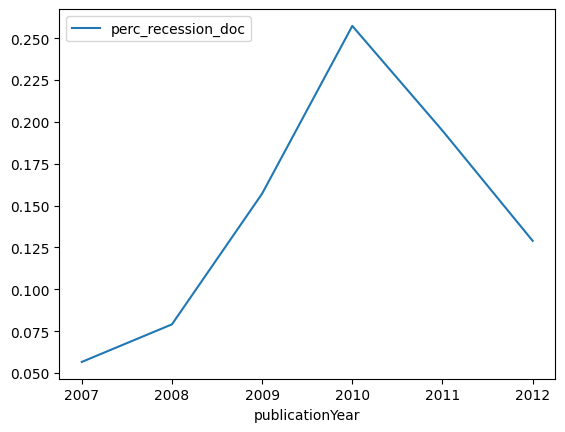

In [31]:
recession_doc_count_by_year.plot(x='publicationYear', y='perc_recession_doc', kind='line')

We can also make a bar chart showing the number of docs oer year and the number of docs that mentioned 'recession' for each year.

<AxesSubplot: xlabel='publicationYear'>

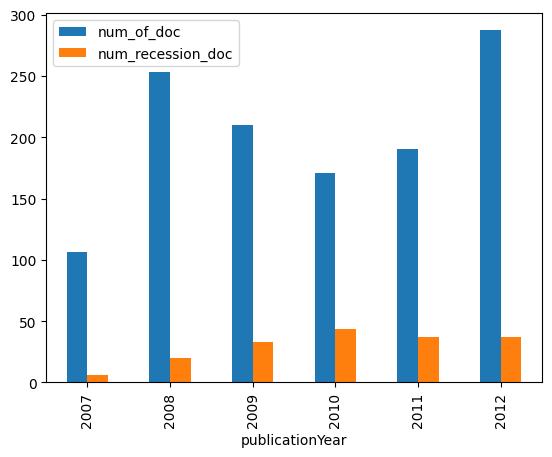

In [33]:
recession_doc_count_by_year.plot(x='publicationYear', y=['num_of_doc', 'num_recession_doc'], kind='bar')

<h1 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h1>

Build a dataset on Constellate; make a dataframe from your dataset; manipulate the data; get some useful information from your dataset; plot the information you get.